In [2]:
import pandas as pd

In [6]:
# import required module
import os
from fast_ml.feature_selection import get_constant_features
 
dataset = pd.DataFrame()

directory = "raw_behaviors_no_agent_rp3"
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(filepath):
        sub_dataset = pd.read_csv(filepath)
        dataset = pd.concat([dataset, sub_dataset], axis=0)        
        #constant_features = set(get_constant_features(dataset, threshold=0.99, dropna=False)['Var'])
        #constant_feature_sets.append(constant_features)

print(dataset.shape)
#df['attack'] = attack
# bdata[attack] = df.to_numpy()
#if not os.path.isfile(file_name):
#    full_df = pd.concat([full_df, df])        
        
        
#consistently_constant_features = list(constant_feature_sets[0].intersection(*constant_feature_sets))
#consistently_constant_features.sort() 
#print(len(consistently_constant_features))
#for consistently_constant_feature in consistently_constant_features:
#    print(consistently_constant_feature)

(71426, 100)


In [13]:
constant_features = set(get_constant_features(dataset, threshold=0.99, dropna=False)['Var'])
#print(constant_features)
for constant_feature in constant_features:
    print(constant_feature)

cpuNice
alarmtimer:alarmtimer_fired
alarmtimer:alarmtimer_start
connectivity
udp:udp_fail_queue_rcv_skb
cpuHardIrq
cachefiles:cachefiles_lookup
cachefiles:cachefiles_mark_active
tasksStopped
dma_fence:dma_fence_init
clk:clk_set_rate
cachefiles:cachefiles_create


In [27]:
import pandas as pd

corr_matrix = dataset.corr().abs()


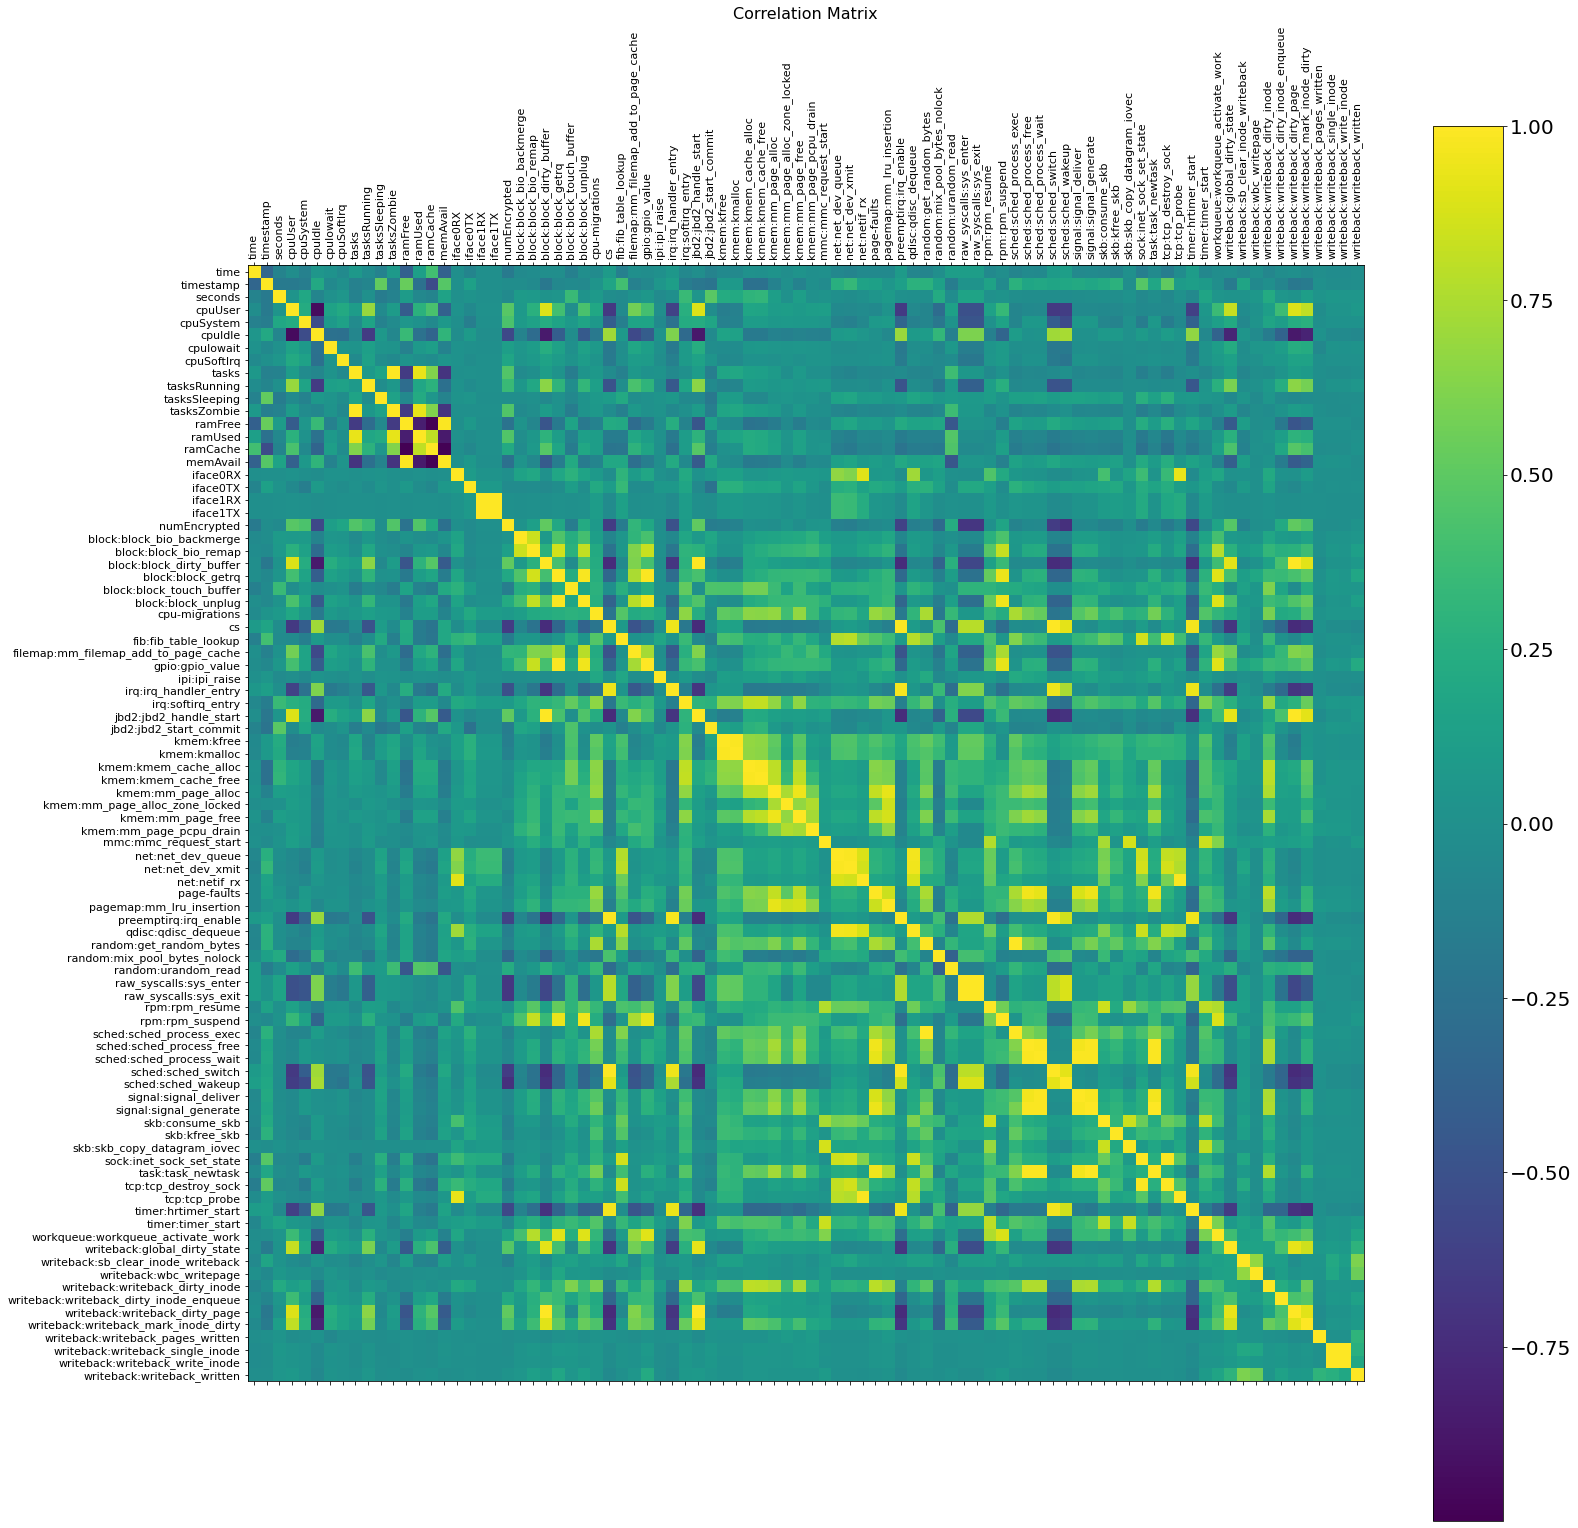

In [26]:
import matplotlib.pyplot as plt
df = dataset.drop(labels=constant_features, inplace=False, axis=1)
f = plt.figure(figsize=(25, 25))
plt.matshow(df.corr(), fignum=f.number, cmap=cmap)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=11, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=16);

In [29]:
import numpy as np
# get upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# find features with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
print(len(to_drop))

['tasksZombie', 'ramCache', 'memAvail', 'iface1TX', 'block:block_unplug', 'gpio:gpio_value', 'jbd2:jbd2_handle_start', 'kmem:kmalloc', 'kmem:kmem_cache_free', 'net:net_dev_xmit', 'preemptirq:irq_enable', 'qdisc:qdisc_dequeue', 'raw_syscalls:sys_exit', 'rpm:rpm_suspend', 'sched:sched_process_exec', 'sched:sched_process_free', 'sched:sched_process_wait', 'sched:sched_switch', 'signal:signal_deliver', 'signal:signal_generate', 'task:task_newtask', 'tcp:tcp_destroy_sock', 'tcp:tcp_probe', 'timer:hrtimer_start', 'writeback:writeback_dirty_page', 'writeback:writeback_write_inode']
26


In [30]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)
print(to_drop)

['tasksZombie', 'ramCache', 'memAvail', 'iface1TX', 'block:block_unplug', 'gpio:gpio_value', 'jbd2:jbd2_handle_start', 'kmem:kmalloc', 'kmem:kmem_cache_free', 'net:net_dev_xmit', 'preemptirq:irq_enable', 'qdisc:qdisc_dequeue', 'raw_syscalls:sys_exit', 'rpm:rpm_suspend', 'sched:sched_process_exec', 'sched:sched_process_free', 'sched:sched_process_wait', 'sched:sched_switch', 'signal:signal_deliver', 'signal:signal_generate', 'task:task_newtask', 'tcp:tcp_destroy_sock', 'tcp:tcp_probe', 'timer:hrtimer_start', 'writeback:writeback_dirty_page', 'writeback:writeback_write_inode']


In [118]:
df.corr().head(100)

,time,timestamp,seconds,connectivity,cpuUser,cpuSystem,cpuNice,cpuIdle,cpuIowait,cpuHardIrq,...,writeback:sb_clear_inode_writeback,writeback:wbc_writepage,writeback:writeback_dirty_inode,writeback:writeback_dirty_inode_enqueue,writeback:writeback_dirty_page,writeback:writeback_mark_inode_dirty,writeback:writeback_pages_written,writeback:writeback_single_inode,writeback:writeback_write_inode,writeback:writeback_written
time,1.000000,0.999999,0.003064,NaN,0.014124,0.072886,NaN,-0.053622,-0.022169,NaN,...,0.139348,0.090824,0.004831,0.115583,0.140307,0.024119,0.016102,0.161386,0.145230,0.125253
timestamp,0.999999,1.000000,0.003088,NaN,0.014132,0.072964,NaN,-0.053671,-0.022153,NaN,...,0.139254,0.090743,0.004814,0.115531,0.140254,0.024096,0.016107,0.161294,0.145163,0.125182
seconds,0.003064,0.003088,1.000000,NaN,-0.044632,-0.011701,NaN,0.044493,0.000270,NaN,...,-0.010184,-0.020936,0.014007,-0.015988,-0.024517,0.010928,0.014488,-0.026553,-0.023093,-0.025743
connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpuUser,0.014124,0.014132,-0.044632,NaN,1.000000,-0.002111,NaN,-0.829564,-0.000007,NaN,...,0.030224,-0.002049,-0.146518,0.012071,0.027562,-0.142926,0.023065,0.027812,0.032722,0.023212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
writeback:writeback_mark_inode_dirty,0.024119,0.024096,0.010928,NaN,-0.142926,-0.019143,NaN,0.128031,0.023635,NaN,...,0.096813,0.071745,0.989851,0.119726,0.120424,1.000000,-0.006222,0.099279,0.083122,0.087313
writeback:writeback_pages_written,0.016102,0.016107,0.014488,NaN,0.023065,-0.034362,NaN,-0.000397,0.003721,NaN,...,0.061510,0.060228,-0.008869,0.028745,0.018519,-0.006222,1.000000,0.075977,0.069401,0.274509
writeback:writeback_single_inode,0.161386,0.161294,-0.026553,NaN,0.027812,0.017580,NaN,-0.033783,-0.019321,NaN,...,0.826564,0.635284,0.013340,0.602001,0.612054,0.099279,0.075977,1.000000,0.892544,0.909313
writeback:writeback_write_inode,0.145230,0.145163,-0.023093,NaN,0.032722,0.007015,NaN,-0.031329,-0.016602,NaN,...,0.584742,0.233264,0.014246,0.403421,0.488999,0.083122,0.069401,0.892544,1.000000,0.799269


In [31]:
correlation_matrix = df.corr()
correlations = {}
for this_feature in correlation_matrix:
    #print(row)
    correlations[this_feature] = []
    #print(corr_matrix[row])
    #for column in corr_matrix[row]:
    for other_feature, feature_correlation in correlation_matrix[this_feature].iteritems():
        #print(column)
        if this_feature == other_feature:
            continue
        
        if feature_correlation > 0.95:
            correlations[this_feature].append(other_feature)
    #print(type(corr_matrix[row]))
    
for this_feature, correlated_features in correlations.items():
    print(f"{this_feature} => {correlated_features}")

time => []
timestamp => []
seconds => []
cpuUser => []
cpuSystem => []
cpuIdle => []
cpuIowait => []
cpuSoftIrq => []
tasks => ['tasksZombie']
tasksRunning => []
tasksSleeping => []
tasksZombie => ['tasks']
ramFree => ['memAvail']
ramUsed => []
ramCache => []
memAvail => ['ramFree']
iface0RX => []
iface0TX => []
iface1RX => ['iface1TX']
iface1TX => ['iface1RX']
numEncrypted => []
block:block_bio_backmerge => []
block:block_bio_remap => []
block:block_dirty_buffer => ['jbd2:jbd2_handle_start', 'writeback:writeback_dirty_page']
block:block_getrq => ['block:block_unplug', 'gpio:gpio_value']
block:block_touch_buffer => []
block:block_unplug => ['block:block_getrq', 'gpio:gpio_value', 'rpm:rpm_suspend']
cpu-migrations => []
cs => ['preemptirq:irq_enable', 'sched:sched_switch', 'timer:hrtimer_start']
fib:fib_table_lookup => []
filemap:mm_filemap_add_to_page_cache => []
gpio:gpio_value => ['block:block_getrq', 'block:block_unplug']
ipi:ipi_raise => []
irq:irq_handler_entry => ['preemptirq:irq

/var/folders/8v/42fl0kws5cs5j84mbf8mbhbh0000gn/T/ipykernel_53384/1099940770.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for other_feature, feature_correlation in correlation_matrix[this_feature].iteritems():
